<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/HEART_ATTACK_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **HEART_ANALYSIS**  ♥


---






                                            Heart Attack Data analysis





 ## DESCRIPTION DATASET

 ### This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them.  In particular, the Cleveland database is the only one that has been used by ML researchers to date.  The "goal" field refers to the presence of heart disease in the patient.  It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  




### Import Python fundamental libraries


1.   NUMpy
2.   Pandas

### Visualization libraries

3.   Matplotlib
4.   Seaborn
5.   Plotly
6.   cufflinks






In [1]:
#Funadamental libraries
import numpy as np
import pandas as pd


In [2]:
#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import cufflinks as cuf

In [3]:
!pip install ucimlrepo

In [4]:
#loading Dataset

from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# metadata
print(heart_disease.metadata)

# variable information
print(heart_disease.variables)


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

In [5]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0


In [6]:
y

,num
0,0
1,2
2,1
3,0
4,0
...,...
298,1
299,2
300,3
301,1


In [7]:
X.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB


This Heart data has 303 observation and 13 features. however, this dataset is preprocessd and cleaned data.Further the features this data has are following (age,	sex,	cp,	trestbps,	chol,	fbs,	restecg,	thalach,	exang,	oldpeak,	slope,	ca,	thal). Though on the very last coloumn there are 2 missing values/observation.moreover, there are no repeating and duplicates in the dataset

In [9]:
#Loading first 5 instances

X.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [10]:
#Checking for missing values
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

In [11]:
#  fill the missing values by mean

X['thal'].fillna(X['thal'].mean(), inplace=True)


In [12]:
X['ca'].fillna(X['ca'].mean(), inplace=True)

In [13]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

 Though on the very last and 2nd last coloumn there are 4 and 2 missing values/observation.further those missing values were filled by it mean by fillna operation

In [14]:
X.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Length: 303, dtype: bool

In [19]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


In [15]:
X['age'].min()

29

In [16]:
X['age'].mean()

54.43894389438944

In [17]:
#highest age in the dataset
X['age'].max()

77

In [18]:
X['chol'].max()

564

In [19]:
# detecting which person has higest chol in the dataset and give the very observation where that is presnt

max_chol = X['chol'].max()
X[X['chol'] == max_chol]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
152,67,0,3,115,564,0,2,160,0,1.6,2,0.0,7.0


In [20]:
max_bps = X['trestbps'].max()
X[X['trestbps'] == max_bps]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
126,56,0,4,200,288,1,2,133,1,4.0,3,2.0,7.0


<Axes: xlabel='cp'>

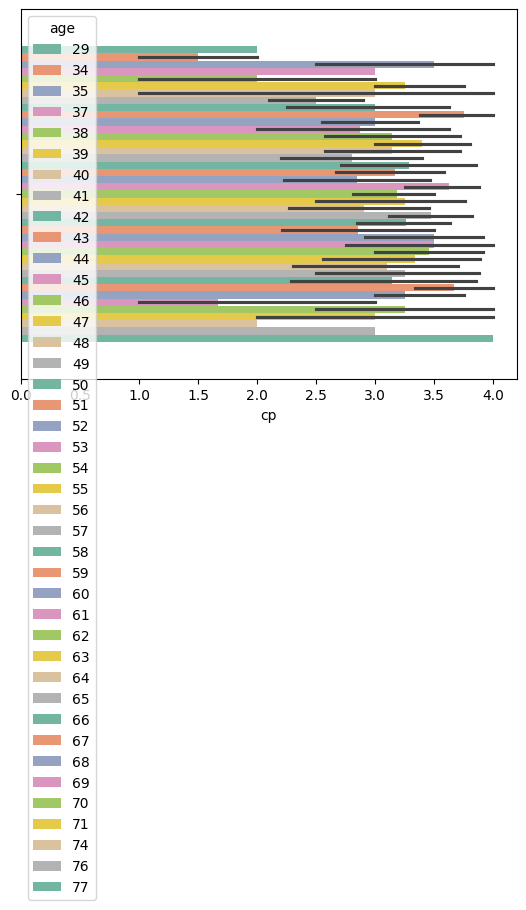

In [22]:
sns.barplot(X, x="cp", hue="age" , palette="Set2")

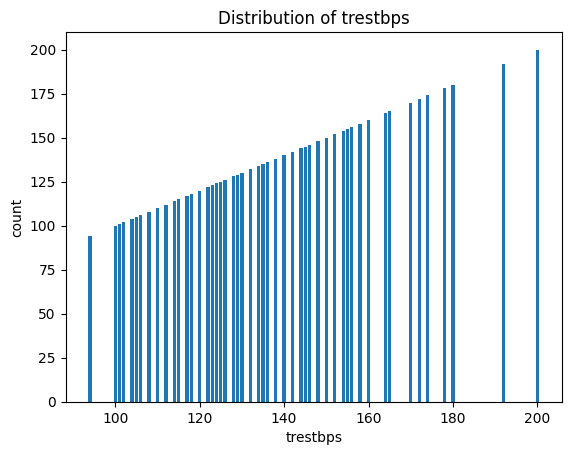

In [23]:


plt.bar(X['trestbps'], height=X['trestbps'])
plt.xlabel('trestbps')
plt.ylabel('count')
plt.title('Distribution of trestbps')
plt.show()


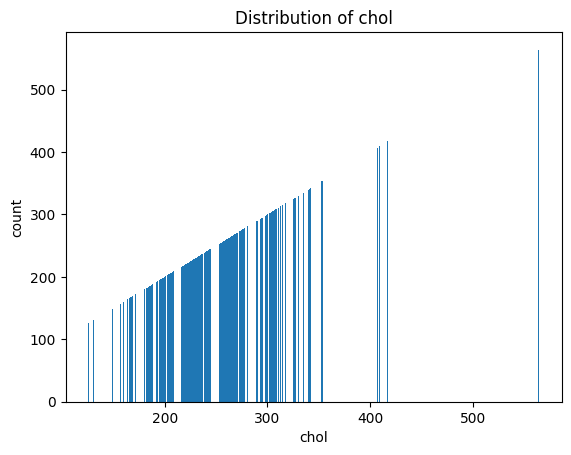

In [24]:
plt.bar(X['chol'], height=X['chol'])
plt.xlabel('chol')
plt.ylabel('count')
plt.title('Distribution of chol')
plt.show()

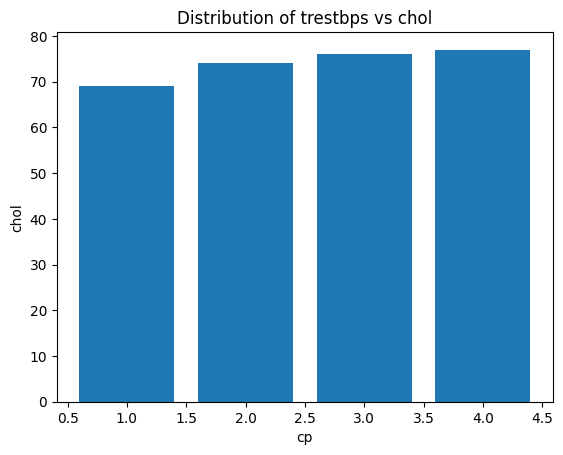

In [27]:
# prompt: make a bar plot trestbps on x axis and chol on y axis

plt.bar(X['cp'], height=X['age'])
plt.xlabel('cp')
plt.ylabel('chol')
plt.title('Distribution of trestbps vs chol')
plt.show()


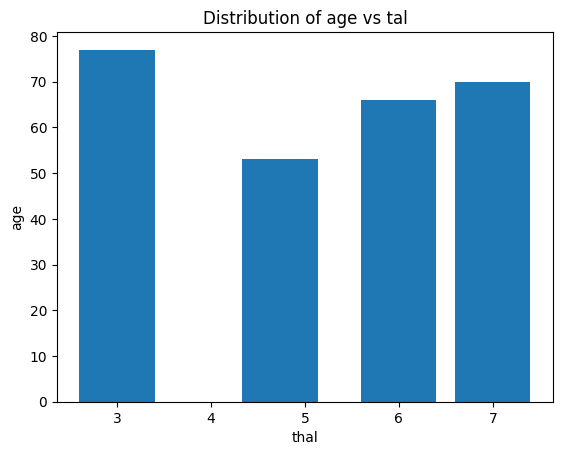

In [29]:
plt.bar(X['thal'], height=X['age'])
plt.xlabel('thal')
plt.ylabel('age')
plt.title('Distribution of age vs tal')
plt.show()

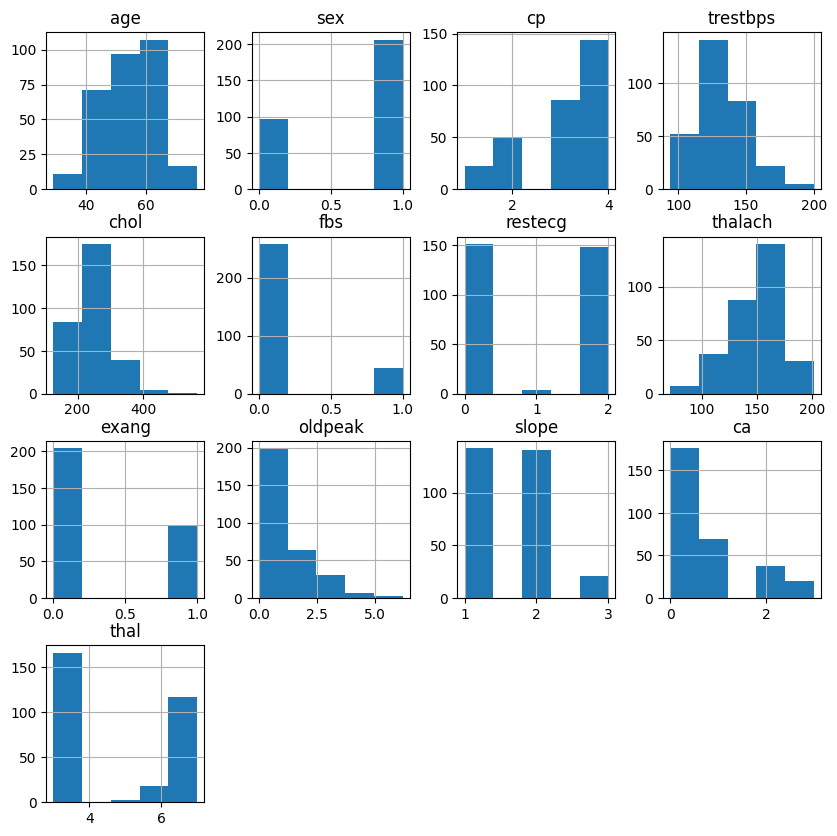

In [54]:
# prompt: make a bar plot only 5 bins should be there  chol and age on x axis and y axis

X.hist(bins=5, figsize=(10, 10))
plt.show()


<Axes: xlabel='sex'>

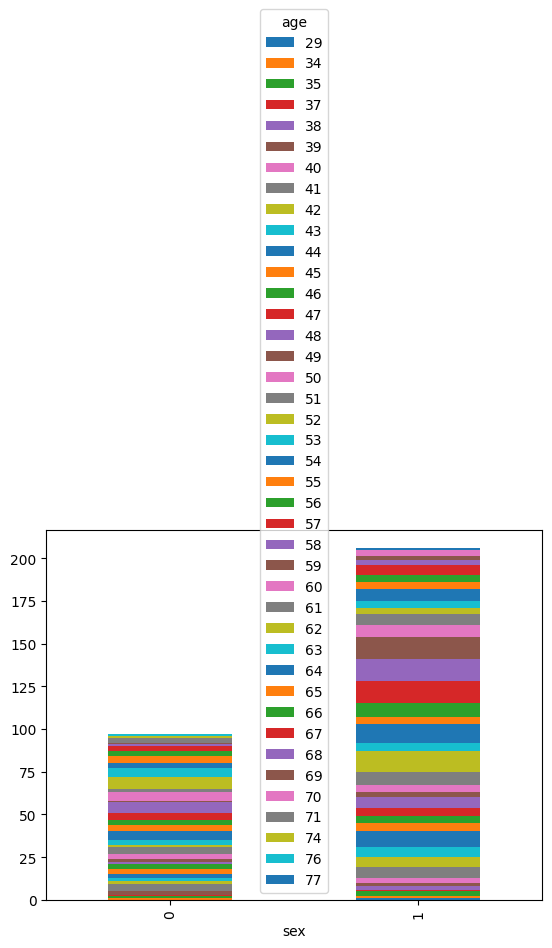

In [31]:
# prompt: make a  stacked bar plot

X.groupby(['sex', 'age']).size().unstack().plot(kind='bar', stacked=True)


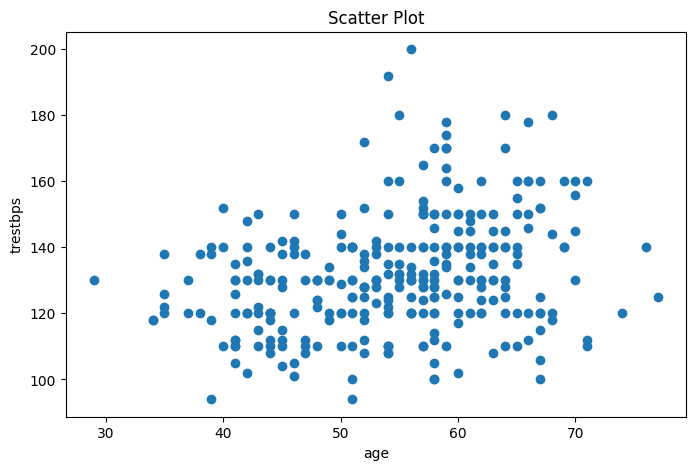

In [32]:
plt.figure(figsize=(8, 5))
plt.scatter(X['age'], X['trestbps'])
plt.title('Scatter Plot')
plt.xlabel('age')
plt.ylabel('trestbps')
plt.show()

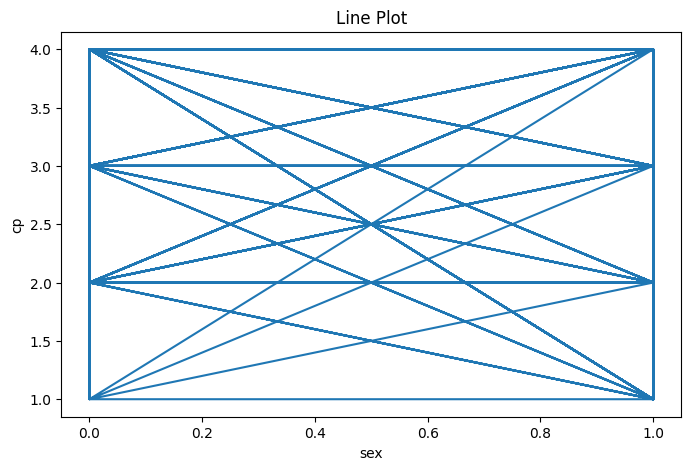

In [35]:
plt.figure(figsize=(8, 5))
plt.plot(X['sex'],X['cp'])
plt.title('Line Plot')
plt.xlabel('sex')
plt.ylabel('cp')
plt.show()

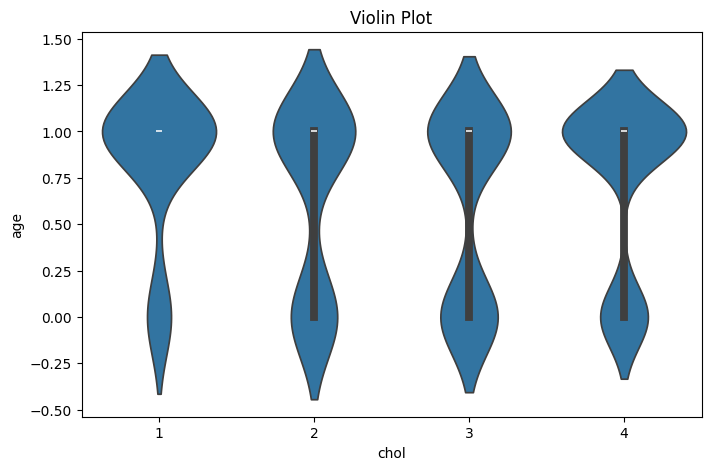

In [37]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='cp', y='sex', data=X)
plt.title('Violin Plot')
plt.xlabel('chol')
plt.ylabel('age')
plt.show()

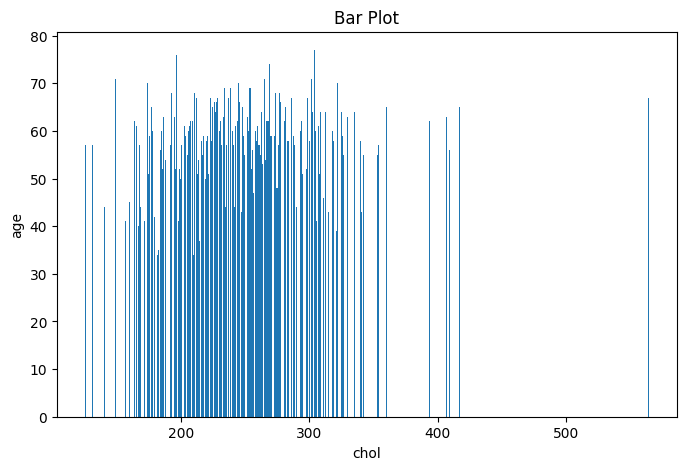

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(x='chol', height='age', data=X)
plt.title('Bar Plot')
plt.xlabel('chol')
plt.ylabel('age')
plt.show()


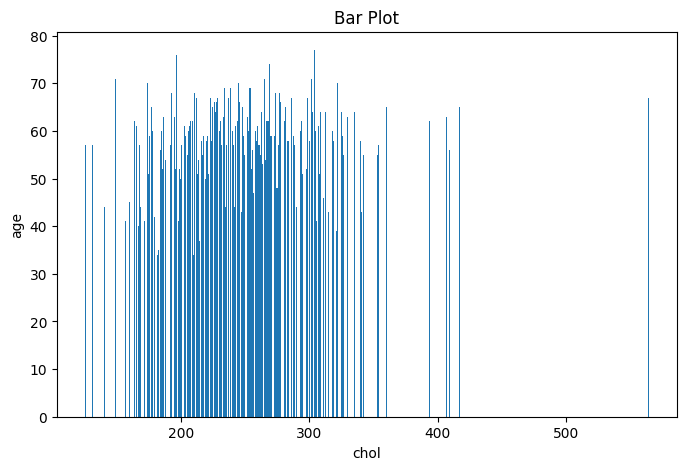

In [72]:
# prompt: make a bar plot bt chol and age and make a iit very clear to understand using plt

plt.figure(figsize=(8, 5))
plt.bar(x='chol', height='age', data=X)
plt.title('Bar Plot')
plt.xlabel('chol')
plt.ylabel('age')
plt.show()


<Axes: xlabel='cp', ylabel='age'>

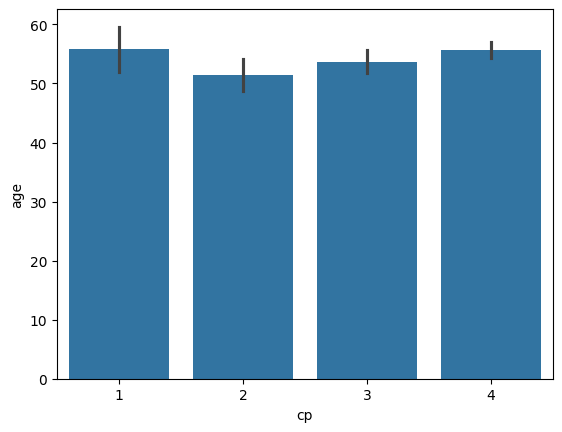

In [38]:
# prompt: make bar plot using seaborn x axis bps and y axis age

sns.barplot(x='cp', y='age', data=X)


<Axes: xlabel='age', ylabel='count'>

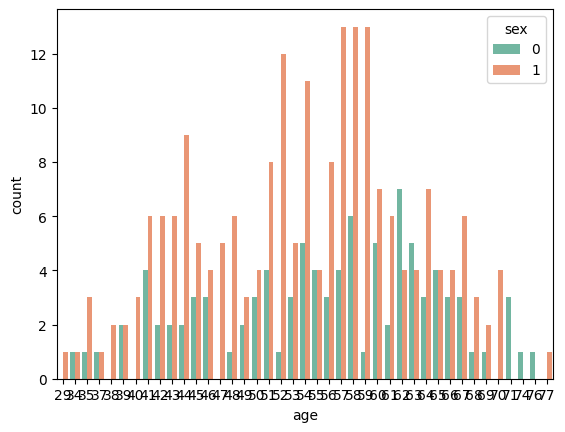

In [41]:
sns.countplot(X, x="age", hue="sex", palette="Set2")

<Axes: xlabel='sex', ylabel='count'>

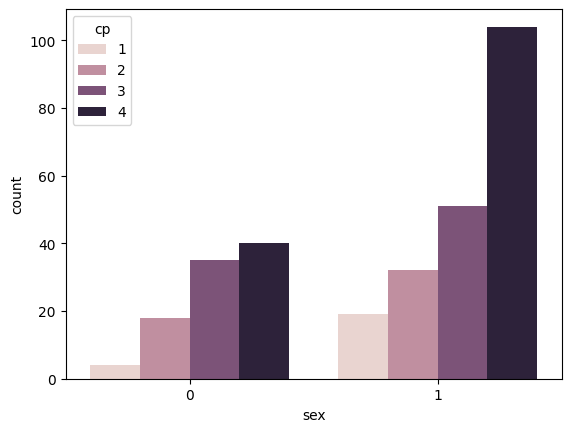

In [80]:
# prompt: make a count plot for sex and cp

sns.countplot(x='sex', hue='cp', data=X)


<Axes: xlabel='sex', ylabel='count'>

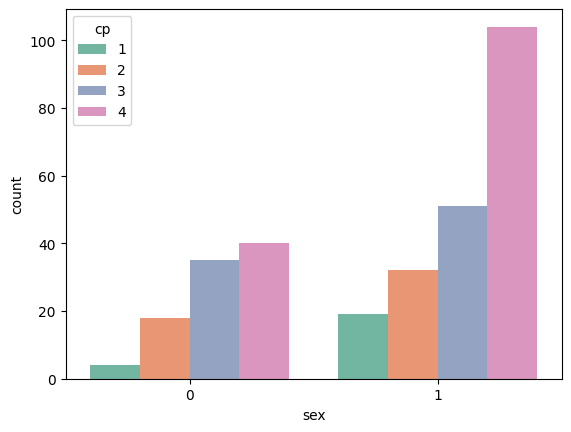

In [82]:
sns.countplot(X, x='sex', hue='cp', palette='Set2')

<Axes: xlabel='sex', ylabel='count'>

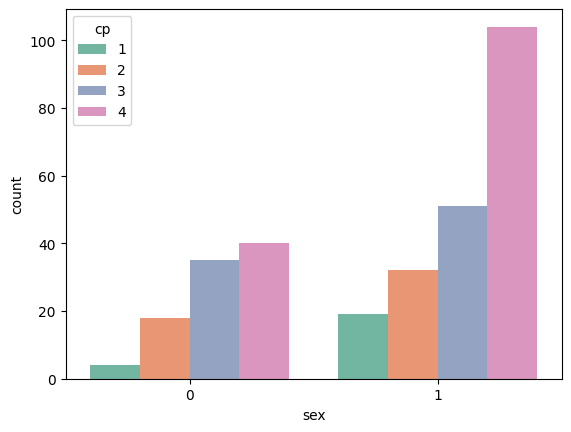

In [84]:
sns.countplot(X, x='sex', hue='cp', palette='Set2')

<Axes: xlabel='thal', ylabel='age'>

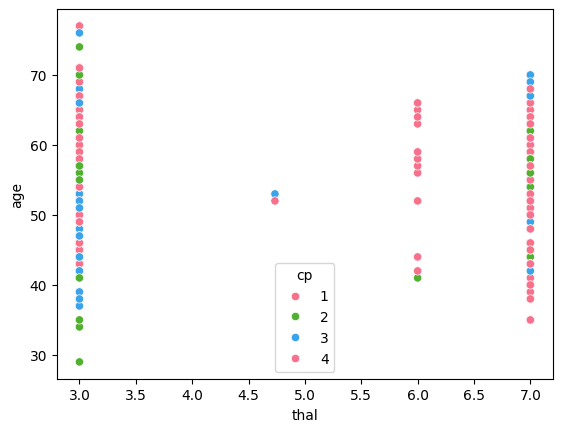

In [42]:
sns.scatterplot(X, x="thal", y="age", hue="cp", palette="husl")

In [44]:
X.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


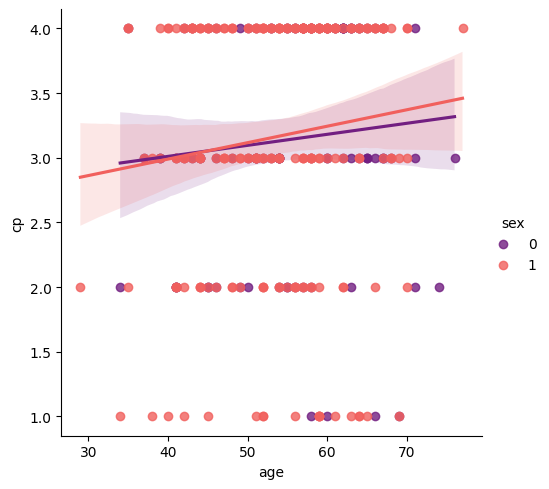

In [48]:
sns.lmplot(X, x="age", y="cp", hue='sex' ,palette="magma")

In [ ]:
# prompt: explain what above lm plot is

The lm plot is a linear regression plot that shows the relationship between two continuous variables, with the third variable (in this case, sex) used as a color hue to distinguish between different groups. In this plot, we can see that there is a positive relationship between age and cp, meaning that as age increases, cp also tends to increase. However, there is also some variation in the data, with some people having a higher cp than others at the same age. The color hue of the points represents the sex of the person, and we can see that there is some difference in the relationship between age and cp for men and women. For example, women tend to have a lower cp than men at the same age.
